In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
import matplotlib.pyplot as plt
import yaml
import cv2
from scipy.spatial.transform import Rotation
from matplotlib.patches import Rectangle


sys.path.append('/home/schiavazza/code/hpe/hpe-core/datasets/')

from vicon_processing.src.projection import ProjectionHelper
from vicon_processing.src.data_helpers import DvsLabeler, DvsHelper, C3dHelper
from vicon_processing.src import vis_utils, utils

In [2]:
# import the DVS data
dvs_file_path = '/home/schiavazza/data/hpe/calibtest/1/ATIS_D'
dvs_helper = DvsHelper(dvs_file_path)

no manual zero time found, using zero instead


In [3]:
# define the point labels to use
labels = [
   "tESTER:LFHD",
   "tESTER:RFHD",
   "tESTER:STRN", 
   'tESTER:LUPA',
   'tESTER:LELB',
   'tESTER:LFRM',
]

In [4]:
dvs_helper.read_points_labels('../data/points.yml');
labels_times = dvs_helper.labeled_points['times'][:2]
print(labels_times)

[8.0, 9.0]


In [5]:
# load c3d vicon data
c3d_file_path = '/home/schiavazza/data/hpe/calibtest/1/S1/trial001.c3d'
c3d_helper = C3dHelper(c3d_file_path)
print(c3d_helper.reader.point_labels)

['tESTER:LFHD                   ' 'tESTER:RFHD                   '
 'tESTER:LBHD                   ' 'tESTER:RBHD                   '
 'tESTER:C7                     ' 'tESTER:T10                    '
 'tESTER:STRN                   ' 'tESTER:RBAK                   '
 'tESTER:LSHO                   ' 'tESTER:LUPA                   '
 'tESTER:LELB                   ' 'tESTER:LFRM                   '
 'tESTER:LWRA                   ' 'tESTER:LWRB                   '
 'tESTER:LFIN                   ' '*15                           '
 '*16                           ' '*17                           '
 '*18                           ' '*19                           '
 '*20                           ' '*21                           '
 '*22                           ' '*23                           '
 '*24                           ' '*25                           '
 '*26                           ' '*27                           '
 '*28                           ' '*29                        

/home/schiavazza/.local/lib/python3.10/site-packages/c3d/c3d.py:1219: UserWarning: No analog data found in file.
  warnings.warn('No analog data found in file.')


In [6]:
c3d_helper.get_frame_time([4.0])

[400]

In [27]:
labels_times = [2.0, 5.0]
vicon_labeled_frames = c3d_helper.get_frame_time(labels_times)
print(vicon_labeled_frames)
vicon_points = c3d_helper.get_vicon_points(vicon_labeled_frames, labels)
vicon_points_mark = c3d_helper.transform_points_to_marker_frame(vicon_points)
# vicon_points_mark = vicon_points

[200, 500]
'camera:side'
'camera:side'


In [8]:
print(f"times from dvs labels: {dvs_helper.labeled_points['times']}")
print(f"times from vicon labels: {vicon_points_mark['times']}")
print(c3d_helper.start_time)
c3d_helper.find_start_time()
c3d_helper.calculate_frame_times()

times from dvs labels: [8.0, 9.0, 11.0]
times from vicon labels: [2.00138696 5.00346741]
0.0


array([0.00000000e+00, 1.00069348e-02, 2.00138696e-02, ...,
       1.44099861e+01, 1.44199931e+01, 1.44300000e+01])

In [9]:
# # are we finding the correct marker frame of reference?


# for k in range(1, 2000, 20):
#     c3d_helper.marker_T_at_frame_vector(k)

In [24]:
vicon_points_mark

{'points': [{'tESTER:LFHD': array([-90.85660973, 802.40165829, 847.39449879,   1.        ]),
   'tESTER:RFHD': array([-71.84398536, 849.20336882, 799.95997674,   1.        ]),
   'tESTER:STRN': array([-26.68028347, 501.04059028, 535.98555882,   1.        ]),
   'tESTER:LUPA': array([108.38030936, 387.48368997, 761.0487803 ,   1.        ]),
   'tESTER:LELB': array([ 88.5757242 , 194.89671031, 654.66377472,   1.        ]),
   'tESTER:LFRM': array([ 24.67932917, 143.27429609, 573.63417051,   1.        ])},
  {'tESTER:LFHD': array([-23.22921238, 471.36198225, 754.28162508,   1.        ]),
   'tESTER:RFHD': array([ -8.41889149, 522.59397313, 708.80554914,   1.        ]),
   'tESTER:STRN': array([ 71.28446465, 235.27205026, 470.09772506,   1.        ]),
   'tESTER:LUPA': array([228.12340736, 134.76149379, 729.91930755,   1.        ]),
   'tESTER:LELB': array([192.58152935, -23.98015549, 802.24023607,   1.        ]),
   'tESTER:LFRM': array([118.91964494,   8.00976191, 846.393662  ,   1.     

In [26]:
proj_helper = ProjectionHelper(vicon_points_mark, dvs_helper.labeled_points)
proj_helper.import_camera_calbration('../scripts/config/temp_calib.txt');

The stored image labels probably don't match with the vicon labels used.
'tESTER:LFHD'
The stored image labels probably don't match with the vicon labels used.
'tESTER:RFHD'
The stored image labels probably don't match with the vicon labels used.
'tESTER:STRN'
The stored image labels probably don't match with the vicon labels used.
'tESTER:LUPA'
The stored image labels probably don't match with the vicon labels used.
'tESTER:LELB'
The stored image labels probably don't match with the vicon labels used.
'tESTER:LFRM'
The stored image labels probably don't match with the vicon labels used.
'tESTER:LFHD'
The stored image labels probably don't match with the vicon labels used.
'tESTER:RFHD'
The stored image labels probably don't match with the vicon labels used.
'tESTER:STRN'
The stored image labels probably don't match with the vicon labels used.
'tESTER:LUPA'
The stored image labels probably don't match with the vicon labels used.
'tESTER:LELB'
The stored image labels probably don't matc

In [11]:
# tmp = np.copy(proj_helper.image_points[:13])
# proj_helper.image_points[:13] = proj_helper.image_points[13:]
# proj_helper.image_points[13:] = tmp
# proj_helper.world_points = np.flip(proj_helper.world_points, axis=0)

In [12]:
T = proj_helper.find_R_t_opencv_ransac()
# T = proj_helper.T_to_transform(T)
print(T)

[[ 8.54743913e-01 -2.97247478e-01  4.25507672e-01  6.17745819e+06]
 [ 3.92727786e-01 -1.65647626e-01 -9.04613592e-01  4.19885752e+06]
 [ 3.39378445e-01  9.40321647e-01 -2.48489555e-02 -9.79239624e+06]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


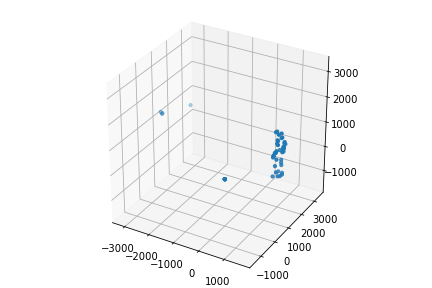

In [21]:
%matplotlib widget
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_box_aspect([1.0, 1.0, 1.0])

zero_Tr = np.eye(4)

# points = np.vstack((c3d_helper.points_dict_to_array(c3d_helper.get_points_dict(769))[14:16], c3d_helper.points_dict_to_array(c3d_helper.get_points_dict(769))[17:18]))
points= c3d_helper.points_dict_to_array(c3d_helper.get_points_dict(769))[:]
vis_utils.plot_points_3d(ax, 
        proj_helper.transform_points(
            points, zero_Tr))

# for i in range(len(vicon_labeled_frames)):
#     marker_T = np.linalg.inv(c3d_helper.markers_T[vicon_labeled_frames[i]])
#     vis_utils.plot_points_3d(ax,
#                             proj_helper.transform_points(
#                                 proj_helper.world_points[i*13:(1+i)*13],
#                                 marker_T
#                             )
#     )

# vis_utils.plot_frame(ax, zero_Tr)

# for Tr in c3d_helper.markers_T.values():
#     vis_utils.plot_frame(ax, np.linalg.inv(Tr))
#     # vis_utils.plot_frame(ax, np.linalg.inv(Tr) @ np.linalg.inv(T))

vis_utils.set_axes_equal(ax)
plt.tight_layout()
plt.show()

In [14]:
c3d_helper.points_dict_to_array(c3d_helper.get_points_dict(769)).shape[0]

52

In [15]:
plt.close()

In [16]:
projected_points = proj_helper.project_to_frame(
    proj_helper.transform_points(
        proj_helper.world_points, zero_Tr
        )
    )

No such comm: d73ff3e428d946d7aa37e07c2647c681


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


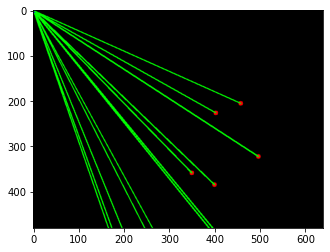

In [17]:
%matplotlib inline
plt.clf()
frame = np.zeros((480, 640, 3))
frame = vis_utils.plot_2d_difference(frame, proj_helper.image_points, projected_points)
plt.imshow(frame)
plt.show()

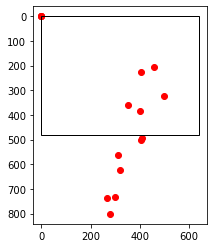

In [18]:
%matplotlib inline
fig = plt.figure()
ax = plt.axes()

vis_utils.plot_2d_points_plt(ax, projected_points[:13], color=(1.0, 0.0, 0.0))
vis_utils.plot_2d_points_plt(ax, projected_points[13:26], color=(0.0, 1.0, 0.0))
vis_utils.plot_2d_points_plt(ax, projected_points[26:39], color=(0.0, 0.0, 1.0))

alpha = 0.3
vis_utils.plot_2d_points_plt(ax, proj_helper.image_points[:13], color=(1.0, 0.0, 0.0), alpha=alpha)
vis_utils.plot_2d_points_plt(ax, proj_helper.image_points[13:26], color=(0.0, 1.0, 0.0), alpha=alpha)
vis_utils.plot_2d_points_plt(ax, proj_helper.image_points[26:39], color=(0.0, 0.0, 1.0), alpha=alpha)

ax.add_patch(Rectangle((0, 0), 640, 480, fill=False))

xlim = ax.get_xlim()
ylim = ax.get_ylim()

ax.set_xlim(min(0, xlim[0]), max(640, xlim[1]))
ax.set_ylim(min(0, ylim[0]), max(480, ylim[1]))

ax.axes.set_aspect('equal')

plt.gca().invert_yaxis()

In [19]:
projected_points

array([[267.90194905, 738.97434911,   1.        ],
       [277.43708123, 801.59531535,   1.        ],
       [299.36244587, 732.36444362,   1.        ],
       [404.62391829, 499.87895438,   1.        ],
       [400.72997787, 384.39524527,   1.        ],
       [350.18969847, 358.21192875,   1.        ],
       [309.75868031, 563.11050809,   1.        ],
       [320.12061621, 624.48633614,   1.        ],
       [409.67833798, 495.14380875,   1.        ],
       [497.80091384, 322.63340385,   1.        ],
       [458.10467263, 205.46889622,   1.        ],
       [403.57913566, 226.96371043,   1.        ]])

In [20]:
proj_helper.image_points = projected_points

In [140]:
labels = [
    # '*30',
    # '*33',
    # '*32',
    '*31',
    '*29',
    '*28',
    '*27',
    '*26',
    '*25'
    ]

In [141]:
labels_times = [2.0]
vicon_labeled_frames = c3d_helper.get_frame_time(labels_times)
print(vicon_labeled_frames)
vicon_points = c3d_helper.get_vicon_points(vicon_labeled_frames, labels)
# vicon_points_mark = c3d_helper.transform_points_to_marker_frame(vicon_points)

[200]


In [142]:
vicon_points

{'points': [{'*31': array([1070.6907,  379.6344,  464.414 ], dtype=float32),
   '*29': array([-3072.3389,   966.4387,  1262.6041], dtype=float32),
   '*28': array([1065.4983,  798.1286, 1195.5912], dtype=float32),
   '*27': array([1036.641 ,  788.7374,  362.7383], dtype=float32),
   '*26': array([956.3276, 797.3431, 897.0354], dtype=float32),
   '*25': array([1063.4889 ,  823.38855, 1096.668  ], dtype=float32)}],
 'times': array([2.00138696]),
 'frame_ids': [200]}

[[ 1.06348889e+03  8.23388550e+02  1.09666797e+03  1.00000000e+00]
 [ 9.56327576e+02  7.97343079e+02  8.97035400e+02  1.00000000e+00]
 [ 1.03664099e+03  7.88737427e+02  3.62738312e+02  1.00000000e+00]
 [ 1.06549829e+03  7.98128601e+02  1.19559119e+03  1.00000000e+00]
 [-3.07233887e+03  9.66438721e+02  1.26260413e+03  1.00000000e+00]
 [ 1.07069067e+03  3.79634399e+02  4.64414001e+02  1.00000000e+00]]


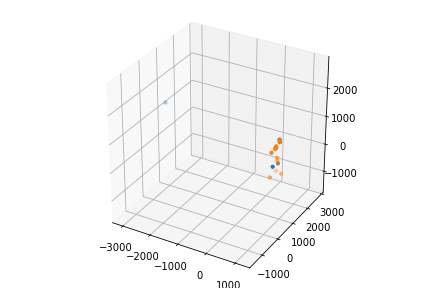

In [143]:
%matplotlib widget
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_box_aspect([1.0, 1.0, 1.0])

zero_Tr = np.eye(4)

# points = np.vstack((c3d_helper.points_dict_to_array(c3d_helper.get_points_dict(769))[14:16], c3d_helper.points_dict_to_array(c3d_helper.get_points_dict(769))[17:18]))
points= c3d_helper.points_dict_to_array(vicon_points)[:, :]
print(points)
vis_utils.plot_points_3d(ax, 
        proj_helper.transform_points(
            points, zero_Tr))

points= c3d_helper.points_dict_to_array(c3d_helper.get_points_dict(200))[:14]
vis_utils.plot_points_3d(ax, 
        proj_helper.transform_points(
            points, zero_Tr))

# for i in range(len(vicon_labeled_frames)):
#     marker_T = np.linalg.inv(c3d_helper.markers_T[vicon_labeled_frames[i]])
#     vis_utils.plot_points_3d(ax,
#                             proj_helper.transform_points(
#                                 proj_helper.world_points[i*13:(1+i)*13],
#                                 marker_T
#                             )
#     )

# vis_utils.plot_frame(ax, zero_Tr)

# for Tr in c3d_helper.markers_T.values():
#     vis_utils.plot_frame(ax, np.linalg.inv(Tr))
#     # vis_utils.plot_frame(ax, np.linalg.inv(Tr) @ np.linalg.inv(T))

vis_utils.set_axes_equal(ax)
plt.tight_layout()
plt.show()